Problem statement:

A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. For example, you want to sell a house and you don’t know the price which you can take — it can’t be too low or too high. To find house price you usually try to find similar properties in your neighbourhood and based on gathered data you will try to assess your house price.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
train_data = '/gdrive/My Drive/Colab Notebooks/Data_files/House Price/train.csv'
train = pd.read_csv(train_data)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_data = '/gdrive/My Drive/Colab Notebooks/Data_files/House Price/test.csv'
test = pd.read_csv(test_data)
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train_shape = train.shape
test_shape = test.shape

In [ ]:
print('The shape of our training set: ',train_shape[0], 'houses', 'and', train_shape[1], 'features')
print('The shape of our testing set: ',test_shape[0], 'houses', 'and', test_shape[1], 'features')
print('The testing set has 1 feature less than the training set, which is SalePrice, the target to predict.')

The shape of our training set:  1460 houses and 81 features
The shape of our testing set:  1459 houses and 80 features
The testing set has 1 feature less than the training set, which is SalePrice, the target to predict.


In [ ]:
target = train[['SalePrice']]

**Feature Engineering** 

In [ ]:
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [ ]:
data.shape

(2919, 80)

In [ ]:
def details(df):
  a = pd.DataFrame()
  a['Count'] = df.count()
  a['Null values'] = df.isnull().sum()
  a['Data types'] = df.dtypes
  a['No. of Unique values'] = df.nunique()
  return(a)

In [ ]:
details(data).T

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Count,2919,2919,2915,2433,2919,2919,198,2919,2919,2917,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2918,2918,2895,2896,2919,2919,2919,2838,2837,2837,2840,2918,2839,2918,2918,2918,2919,2919,2919,2918,2919,2919,2919,2919,2917,2917,2919,2919,2919,2919,2918,2919,2917,2919,1499,2762,2760,2760,2918,2918,2760,2760,2919,2919,2919,2919,2919,2919,2919,10,571,105,2919,2919,2919,2918,2919
Null values,0,0,4,486,0,0,2721,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,24,23,0,0,0,81,82,82,79,1,80,1,1,1,0,0,0,1,0,0,0,0,2,2,0,0,0,0,1,0,2,0,1420,157,159,159,1,1,159,159,0,0,0,0,0,0,0,2909,2348,2814,0,0,0,1,0
Data types,int64,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,float64,object,float64,float64,float64,object,object,object,object,int64,int64,int64,int64,float64,float64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,float64,float64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object
No. of Unique values,2919,16,5,128,1951,2,2,4,4,2,5,3,25,9,8,5,8,10,9,118,61,6,8,15,16,4,444,4,5,6,4,4,4,6,991,6,272,1135,1058,6,5,2,5,1083,635,36,1292,4,3,5,3,8,4,4,14,7,5,5,6,103,3,6,603,5,5,3,379,252,183,31,121,14,3,4,4,38,12,5,9,6


In [ ]:
data.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,2919.000000,2919.000000,2915,2433.000000,2919.000000,2919,198,2919,2919,2917,2919,2919,2919,2919,2919,2919,2919,2919.000000,2919.000000,2919.000000,2919.000000,2919,2919,2918,2918,2895,2896.000000,2919,2919,2919,2838,2837,2837,2840,2918.000000,2839,2918.000000,2918.000000,2918.000000,2919,2919,2919,2918,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918,2919.000000,2917,2919.000000,1499,2762,2760.000000,2760,2918.000000,2918.000000,2760,2760,2919,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,10,571,105,2919.000000,2919.000000,2919.000000,2918,2919
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,2265,NaN,NaN,2907,120,1859,2622,2916,2133,2778,443,2511,2889,2425,1471,NaN,NaN,NaN,NaN,2310,2876,1025,1014,1742,NaN,1798,2538,1308,1283,2606,1904,851,NaN,2493,NaN,NaN,NaN,2874,1493,2723,2671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1492,NaN,2717,NaN,744,1723,NaN,1230,NaN,NaN,2604,2654,2641,NaN,NaN,NaN,NaN,NaN,NaN,4,329,95,NaN,NaN,NaN,2525,2402
mean,1460.000000,57.137718,NaN,69.305795,10168.114080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.089072,5.564577,1971.312778,1984.264474,NaN,NaN,NaN,NaN,NaN,102.201312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441.423235,NaN,49.582248,560.772104,1051.777587,NaN,NaN,NaN,NaN,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,NaN,6.451524,NaN,0.597122,NaN,NaN,1978.113406,NaN,1.766621,472.874572,NaN,NaN,NaN,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,NaN,NaN,NaN,50.825968,6.213087,2007.792737,NaN,NaN
std,842.787043,42.517628,NaN,23.344905,7886.996359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.409947,1.113131,30.291442,20.894344,NaN,NaN,NaN,NaN,NaN,179.334253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.610826,NaN,169.205611,439.543659,440.766258,NaN,NaN,NaN,NaN,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,NaN,1.569379,NaN,0.646129,NaN,NaN,25.574285,NaN,0.761624,215.394815,NaN,NaN,NaN,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,NaN,NaN,NaN,567.402211,2.714762,1.314964,NaN,NaN
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1895.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.

In [ ]:
Null = (data.isnull().sum()/len(data))*100
Null = Null[Null>0]
Null.sort_values(ascending=False, inplace=True)
Null

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageFinish     5.447071
GarageYrBlt      5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Utilities        0.068517
Functional       0.068517
Exterior2nd      0.034258
Exterior1st      0.034258
SaleType         0.034258
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
Electrical       0.034258
KitchenQual      0.034258
GarageCars       0.034258
GarageArea       0.034258
TotalBsmtSF      0.034258
dtype: float64

In [ ]:
Null = Null.to_frame()
Null.columns = ['Count']
Null.index.names = ['name']
Null['Name'] = Null.index

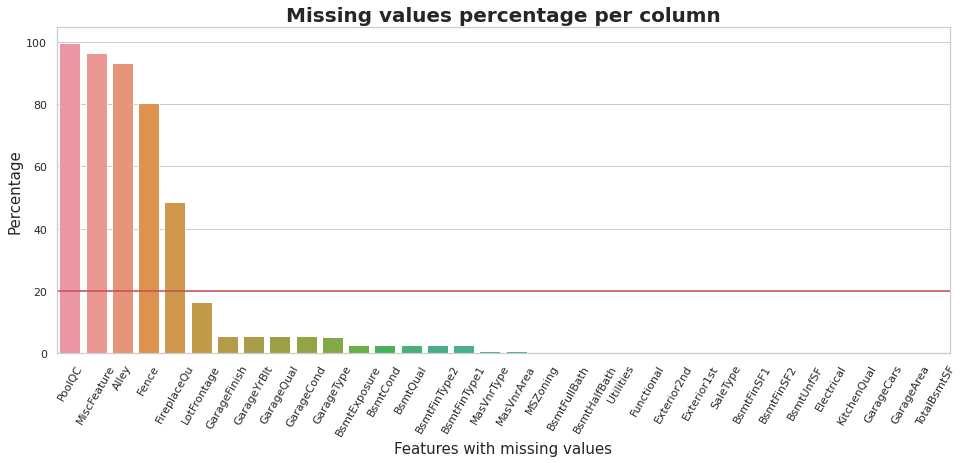

In [ ]:
thresh = 20
plt.figure(figsize=(16, 6))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='Count', data=Null)
plt.axhline(y=thresh, color='r', linestyle='-')
plt.xticks(rotation = 60)
plt.title('Missing values percentage per column', fontsize=20, weight='bold')
plt.xlabel('Features with missing values',size=15)
plt.ylabel('Percentage',size=15)
plt.show()

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
for c in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','MasVnrType','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[c] = data[c].fillna('None')

In [ ]:
for c in ('GarageYrBlt','GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
    data[c] = data[c].fillna(0)

In [ ]:
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [ ]:
for c in ('MSZoning','Electrical','Exterior1st','Exterior2nd','KitchenQual','SaleType'):
  data[c] = data[c].fillna(data[c].mode()[0])

In [ ]:
data['Functional'] = data['Functional'].fillna('Typ')

In [ ]:
data = data.drop(['Utilities'], axis=1)

In [ ]:
import datetime as dt

In [ ]:
for c in ('BsmtFullBath','BsmtHalfBath','GarageCars'):
  data[c] = data[c].astype(int)

In [ ]:
for c in ('MSSubClass','OverallQual','OverallCond'):
  data[c] = data[c].astype(str)

In [ ]:
data['YearBuilt'] = pd.to_datetime(data['YearBuilt'],format='%Y')

In [ ]:
data['YearBuilt'] = data['YearBuilt'].dt.year

In [ ]:
data['YearRemodAdd'] = pd.to_datetime(data['YearRemodAdd'],format='%Y')

In [ ]:
data['YearRemodAdd'] = data['YearRemodAdd'].dt.year

In [ ]:
data['GarageYrBlt'] = data['GarageYrBlt'].astype(int)

In [ ]:
data['MoSold'] = pd.to_datetime(data['MoSold'],format='%m')

In [ ]:
data['MoSold'] = data['MoSold'].dt.month

In [ ]:
data['YrSold'] = pd.to_datetime(data['YrSold'],format='%Y')

In [ ]:
data['YrSold'] = data['YrSold'].dt.year

In [ ]:
data.drop('Id', axis=1, inplace=True)

In [ ]:
cat_features = data.select_dtypes(include=object)
cat_features.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [ ]:
num_features = data.select_dtypes(include=[int,float])
num_features.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548.0,0,61,0,0,0,0,0,2,2008
1,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0,1,2,0,3,1,6,1,1976,2,460.0,298,0,0,0,0,0,0,5,2007
2,68.0,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1,0,2,1,3,1,6,1,2001,2,608.0,0,42,0,0,0,0,0,9,2008
3,60.0,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1,0,1,0,3,1,7,1,1998,3,642.0,0,35,272,0,0,0,0,2,2006
4,84.0,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000,3,836.0,192,84,0,0,0,0,0,12,2008


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for c in cat_features.columns:
    le = LabelEncoder()
    data[c] = le.fit_transform(data[c])

In [ ]:
skewness = num_features.skew().sort_values(ascending=False)
skewness = pd.DataFrame(skewness)
skewness.columns = ['Skew'] 
skewness

,Skew
MiscVal,21.958480
PoolArea,16.907017
LotArea,12.829025
LowQualFinSF,12.094977
3SsnPorch,11.381914
KitchenAbvGr,4.304467
BsmtFinSF2,4.148275
EnclosedPorch,4.005950
ScreenPorch,3.948723
BsmtHalfBath,3.933616


In [ ]:
skew_features = skewness[abs(skewness['Skew'])>0.75]
skew_features

,Skew
MiscVal,21.958480
PoolArea,16.907017
LotArea,12.829025
LowQualFinSF,12.094977
3SsnPorch,11.381914
KitchenAbvGr,4.304467
BsmtFinSF2,4.148275
EnclosedPorch,4.005950
ScreenPorch,3.948723
BsmtHalfBath,3.933616


In [ ]:
from scipy import stats

In [ ]:
for c in skew_features.index:
    num_features[c] = num_features[c]+1
    num_features[c], lmbda = stats.boxcox(num_features[c])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
num_features.skew()

LotFrontage       0.174809
LotArea           0.103406
YearBuilt        -0.600114
YearRemodAdd     -0.451252
MasVnrArea        0.457565
BsmtFinSF1       -0.400889
BsmtFinSF2        2.356483
BsmtUnfSF        -0.276759
TotalBsmtSF       0.113105
1stFlrSF         -0.000911
2ndFlrSF          0.295473
LowQualFinSF      8.370238
GrLivArea        -0.000283
BsmtFullBath      0.625153
BsmtHalfBath      3.709166
FullBath          0.167692
HalfBath          0.694924
BedroomAbvGr      0.326492
KitchenAbvGr     -2.064645
TotRmsAbvGrd     -0.001114
Fireplaces        0.733872
GarageYrBlt      -3.817831
GarageCars       -0.219694
GarageArea        0.239380
WoodDeckSF        0.135857
OpenPorchSF      -0.026074
EnclosedPorch     1.884120
3SsnPorch         8.716812
ScreenPorch       2.916714
PoolArea         14.891972
MiscVal           5.040088
MoSold            0.195985
YrSold            0.132467
dtype: float64

In [ ]:
for c in skew_features.index:
    data[c] = data[c]+1
    data[c], lmbda = stats.boxcox(data[c])

**Splitting train and test**

In [ ]:
train = data.iloc[:train_shape[0]]
test = data.iloc[train_shape[0]:]

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train = ss.fit_transform(train)
X_test = ss.transform(test)

In [ ]:
y_train = target

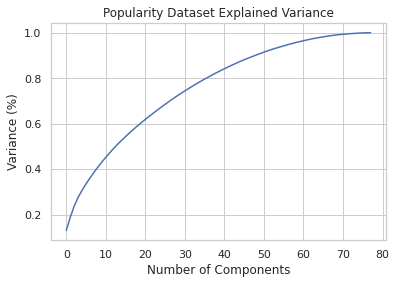

In [ ]:
from sklearn.decomposition import PCA
#Fitting the PCA algorithm with our Data
pca = PCA()
model_pca = pca.fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(model_pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Popularity Dataset Explained Variance')
plt.show()

**Modelling**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
print('Train accuracy : ',lr.score(X_train,y_train))

Train accuracy :  0.8411812524454645


In [ ]:
from google.colab import files

In [ ]:
pd.DataFrame(y_pred).to_csv('submit_lr.csv') 
files.download('submit_lr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print('Train accuracy : ',rfr.score(X_train,y_train))

Train accuracy :  0.9808230179738652


In [ ]:
pd.DataFrame(y_pred).to_csv('submit_rfr.csv') 
files.download('submit_rfr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV

In [ ]:
%%time
n_folds = 5
param_dist = {'n_estimators':range(200,2000,200),
              'max_depth': range(10,100,10),
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt']}
rfr = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator=rfr, param_distributions=param_dist, cv=n_folds)
random_search.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

CPU times: user 15min, sys: 1.6 s, total: 15min 1s
Wall time: 15min 2s


In [ ]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'n_estimators': 1000}

In [ ]:
rfr = RandomForestRegressor(bootstrap=False,
                            max_depth=30,
                            max_features='sqrt',
                            n_estimators=1000,
                            n_jobs=-1)

In [ ]:
rfr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
print('Train accuracy : ',rfr.score(X_train,y_train))

Train accuracy :  0.9999999996956207


In [ ]:
pd.DataFrame(y_pred).to_csv('submit_rfr1.csv') 
files.download('submit_rfr1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from xgboost.sklearn import XGBRegressor

In [ ]:
xgb = XGBRegressor(learning_rate=0.01,
                                            n_estimators=6000,
                                            max_depth=4,
                                            min_child_weight=0,
                                            gamma=0.6,
                                            subsample=0.7,
                                            colsample_bytree=0.7,
                                            objective='reg:linear',
                                            nthread=-1,
                                            scale_pos_weight=1,
                                            seed=27,
                                            reg_alpha=0.00006,
                                            random_state=42,
                      n_jobs=-1)
xgb.fit(X_train, y_train)

[17:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.6,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=0, missing=None, n_estimators=6000,
             n_jobs=-1, nthread=-1, objective='reg:linear', random_state=42,
             reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1, seed=27,
             silent=None, subsample=0.7, verbosity=1)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
print('Train accuracy : ',xgb.score(X_train,y_train))

Train accuracy :  0.999162108705937


In [ ]:
pd.DataFrame(y_pred).to_csv('submit_xgb.csv') 
files.download('submit_xgb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('Train accuracy : ',gbr.score(X_train,y_train))

Train accuracy :  0.9642341370710088


In [ ]:
pd.DataFrame(y_pred).to_csv('submit_gbr.csv') 
files.download('submit_gbr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%time
n_folds = 5
param_dist = {'n_estimators':range(400,4000,400),
              'learning_rate':[0.001,0.01,0.1],
              'max_depth': range(5,50,5),
              'loss': ['ls', 'lad', 'huber', 'quantile'],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf':range(5,50,5),
              'min_samples_split':range(5,50,5)}
gbr = GradientBoostingRegressor()
random_search = RandomizedSearchCV(estimator=gbr, param_distributions=param_dist, cv=n_folds)
random_search.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

CPU times: user 17min 52s, sys: 493 ms, total: 17min 53s
Wall time: 17min 54s


In [ ]:
random_search.best_params_

{'learning_rate': 0.1,
 'loss': 'huber',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 40,
 'n_estimators': 1600}

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                                    learning_rate=0.1,
                                                    max_depth=10,
                                                    max_features='sqrt',
                                                    min_samples_leaf=10,
                                                    min_samples_split=40,
                                                    loss='huber',
                                                    random_state=100
                   )

gbr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='huber',
                          max_depth=10, max_features='sqrt',
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=10,
                          min_samples_split=40, min_weight_fraction_leaf=0.0,
                          n_estimators=6000, n_iter_no_change=None,
                          presort='deprecated', random_state=100, subsample=1.0,
                          tol=0.0001, validation_fraction=0.1, verbose=0,
                          warm_start=False)

In [ ]:
print('Train accuracy : ',gbr.score(X_train,y_train))

Train accuracy :  0.9755046681270804


In [ ]:
y_pred = gbr.predict(X_test)

In [ ]:
pd.DataFrame(y_pred).to_csv('submit_gbr.csv') 
files.download('submit_gbr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>